# Banknote dimensions

Which banknotes exhibit the greatest size differences between denominations? Which are the largest overall?

Banknote dimensions differ widely across countries.

The size of a banknote impacts its practicality. Uniform dimensions enhance durability by ensuring a snug wallet fit, while also enabling vending machines and ATMs to process them seamlessly. Conversely, varied sizes assist the visually impaired in distinguishing denominations, though smaller notes can pose challenges for machine sorting and counting.

Striking a balance between these considerations is essential in currency design.

The file `banknote-dimensions.csv` shows the `length` and `width` in millimeters for 42 currencies. This dataset spans all 22 subregions and sub-subregions of the world, as defined by the United Nations Statistics Division's geoscheme.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'banknote-dimensions.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('banknote-dimensions.csv')
df

,currency,code,value,length,width
0,Argentine Peso,ARS,2,155.0,65.0
1,Argentine Peso,ARS,5,155.0,65.0
2,Argentine Peso,ARS,10,155.0,65.0
3,Argentine Peso,ARS,20,155.0,65.0
4,Argentine Peso,ARS,50,155.0,65.0
...,...,...,...,...,...
245,West African Franc,XOF,500,114.0,60.0
246,West African Franc,XOF,1000,125.0,66.0
247,West African Franc,XOF,2000,130.0,65.0
248,West African Franc,XOF,5000,140.0,74.0


In [12]:
# longest and shortest banknotes for each currency
# modify the code below if you are more interested in width

length = df.groupby('currency').agg(max=('length', 'max'), min=('length', 'min')).reset_index()
length['diff'] = length['max'] - length['min']
length.head()

,currency,max,min,diff
0,Argentine Peso,155.0,155.0,0.0
1,Australian Dollar,158.0,130.0,28.0
2,Bangladeshi Taka,155.0,100.0,55.0
3,Bolivian Boliviano,140.0,140.0,0.0
4,Canadian Dollar,152.4,152.4,0.0


In [43]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col, color='black'):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, color=color, va='center', ha='left')

### Project Ideas

- Generate paired scatter plots to compare the `length` of the longest and shortest banknotes for each currency.

- Create similar paired scatter plots, but for `width` instead of `length`.

- Incorporate the Pro Tips into your visualizations.

- Add labels to data points to highlight key insights or narrate a compelling story.

- Calculate the percentage of currencies where:
	- Only the `length` remains consistent across all denominations.
	- Only the `width` remains consistent across all denominations.
	- Both `length` and `width` vary with denominations.
	- All denominations share identical `length` and `width` dimensions.

- Visualize these findings in a clear, engaging format.

Below is a preliminary paired scatter plot of banknote length to serve as a starting point.

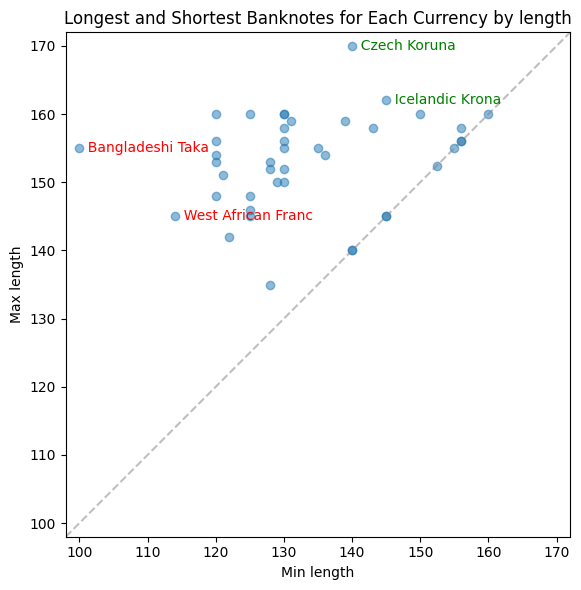

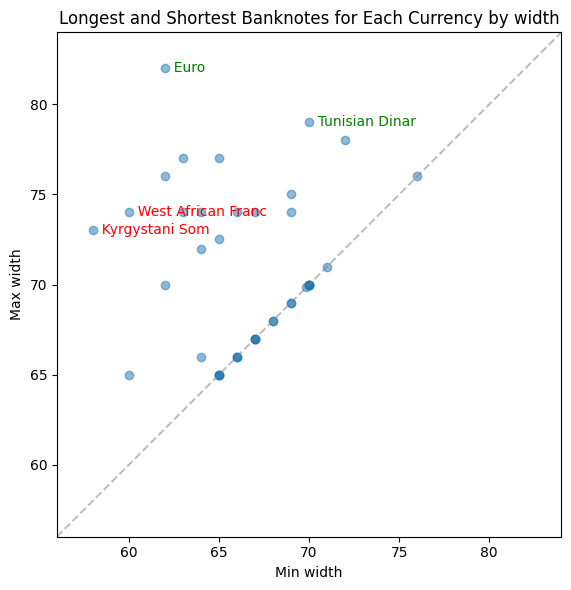

In [89]:
def format_plot(feature):
    plt.xlabel(f'Min {feature}')
    plt.ylabel(f'Max {feature}')
    plt.title(f'Longest and Shortest Banknotes for Each Currency by {feature}')

def add_equality_line(min_val, max_val):
    lims = [min_val, max_val]
    plt.plot(lims, lims, color='gray', linestyle='--', alpha=0.5)

def squared_plot(min_val, max_val):
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.gca().set_aspect(1)


def paired_scatter(df, feature):
    # group by currency, get max and min of the feature
    feature_df = df.groupby('currency').agg(max=(feature, 'max'), min=(feature, 'min')).reset_index()
    feature_df['diff'] = feature_df['max'] - feature_df['min']

    # determine the overall min and max for setting plot limits
    min_val = min(feature_df['min'].min(), feature_df['max'].min())
    max_val = max(feature_df['min'].max(), feature_df['max'].max())

    # determine labels for the 2 longest and shortest banknotes
    label_5_max = feature_df.sort_values(by='max', ascending=False).head(2)
    label_5_min = feature_df.sort_values(by='min', ascending=True).head(2)

    # create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(feature_df['min'], feature_df['max'], alpha=0.5)

    # add labels to each point, format the plot, add equality line and labels
    format_plot(feature)
    add_equality_line(min_val - 2, max_val + 2)
    squared_plot(min_val - 2, max_val + 2)
    add_labels(label_5_max, 'min', 'max', 'currency', 'green')
    add_labels(label_5_min, 'min', 'max', 'currency', 'red')


    plt.tight_layout()
    plt.show()


paired_scatter(df, 'length')
paired_scatter(df, 'width')

In [31]:
# YOUR CODE HERE (add additional cells as needed)
df.iloc[df['width'].idxmax()]

currency     Euro
code          EUR
value         500
length      160.0
width        82.0
Name: 93, dtype: object

In [ ]:
# difference between longest and shortest banknotes for each currency
length_and_width = df.groupby('currency').agg(max_length=('length', 'max'), min_length=('length', 'min'), max_width=('width', 'max'), min_width=('width', 'min')).reset_index()
length_and_width['length_diff'] = length_and_width['max_length'] - length_and_width['min_length']
length_and_width['width_diff'] = length_and_width['max_width'] - length_and_width['min_width']
length_and_width.head()

,currency,max_length,min_length,max_width,min_width,length_diff,width_diff
0,Argentine Peso,155.0,155.0,65.00,65.00,0.0,0.0
1,Australian Dollar,158.0,130.0,72.50,65.00,28.0,7.5
2,Bangladeshi Taka,155.0,100.0,65.00,60.00,55.0,5.0
3,Bolivian Boliviano,140.0,140.0,70.00,70.00,0.0,0.0
4,Canadian Dollar,152.4,152.4,69.85,69.85,0.0,0.0


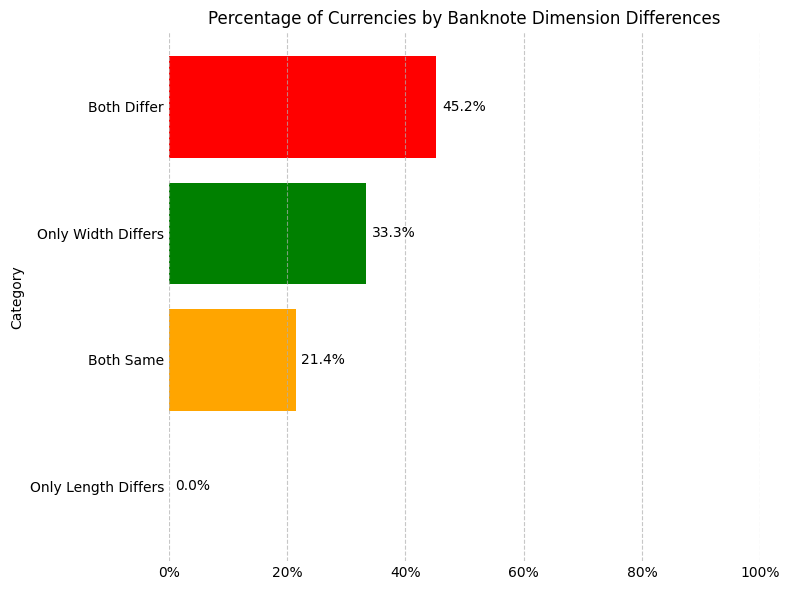

In [90]:
# percentage calculations
percentage_length = length_and_width.query('length_diff == 0 and width_diff > 0').shape[0] / length_and_width.shape[0] * 100
percentage_width = length_and_width.query('width_diff == 0 and length_diff > 0').shape[0] / length_and_width.shape[0] * 100
percentage_both = length_and_width.query('length_diff == 0 and width_diff == 0').shape[0] / length_and_width.shape[0] * 100
percentage_both_dif = length_and_width.query('length_diff > 0 and width_diff > 0').shape[0] / length_and_width.shape[0] * 100

percentaje_df = pd.DataFrame({
    'Category': ['Only Length Differs', 'Only Width Differs', 'Both Same', 'Both Differ'],
    'Percentage': [percentage_length, percentage_width, percentage_both, percentage_both_dif]
}).sort_values(by='Percentage', ascending=True)
# plotting
plt.figure(figsize=(8, 6))
plt.barh(percentaje_df['Category'], percentaje_df['Percentage'], color=['blue', 'orange', 'green', 'red'])


plt.ylabel('Category')
plt.title('Percentage of Currencies by Banknote Dimension Differences')
plt.xlim(0, 100)

plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tick_params('both', length=0)

plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

for i, (cat, val) in enumerate(zip(percentaje_df['Category'], percentaje_df['Percentage'])):
    plt.text(val + 1, i, f"{val:.1f}%", va='center')


plt.tight_layout()
plt.show()

